# ANZ virtaul experience program
## Challenge 1
#### Implement EDA (exploratory data analysis)
Segment the dataset and draw unique insights, including visualisation of the transaction volume and assessing the effect of any outliers.

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Analyzing the dataset

In [2]:
#Load excel into a pandas dataFrame.
train=pd.read_excel("ANZ synthesised transaction dataset.xlsx")
train.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
# No. of data-points and features
print (train.shape)

(12043, 23)


In [4]:
# The column names in our dataset
print (train.columns)

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')


In [5]:
# No. of customers
customers=train["account"].nunique()
customers

100

In [6]:
# No. of transactions present for each status type
train["status"].value_counts()

authorized    7717
posted        4326
Name: status, dtype: int64

In [7]:
# No. of transactions present for each currency type
train["currency"].value_counts()

AUD    12043
Name: currency, dtype: int64

**Observation(s):**

Since all the transactions are in the same currency type, the currency column can be dropped.

In [8]:
# No. of transactions present for each country type
train["country"].value_counts()

Australia    12043
Name: country, dtype: int64

**Observation(s):**

Since all the transactions are in the same country, the country column can be dropped.

In [9]:
# No. of transactions present for each gender type
train["gender"].value_counts()

M    6285
F    5758
Name: gender, dtype: int64

In [10]:
# No. of transactions present for each movement type
train["movement"].value_counts()

debit     11160
credit      883
Name: movement, dtype: int64

In [11]:
# No. of transactions present for each txn description type
train["txn_description"].value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

In [12]:
# No. of null values for each column
train.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [13]:
# Dropping the columns which will not provide any insights like ID'S, latitude values, status etc
train.drop(['card_present_flag', 'bpay_biller_code', 'long_lat', 'merchant_id', 'merchant_code', 'first_name', 
            'transaction_id', 'customer_id', 'merchant_long_lat', 'currency', 'country', 'merchant_suburb', 'merchant_state',
            'balance','status'], axis=1, inplace=True)
train.head()

,account,txn_description,date,gender,age,extraction,amount,movement
0,ACC-1598451071,POS,2018-08-01,F,26,2018-08-01T01:01:15.000+0000,16.25,debit
1,ACC-1598451071,SALES-POS,2018-08-01,F,26,2018-08-01T01:13:45.000+0000,14.19,debit
2,ACC-1222300524,POS,2018-08-01,M,38,2018-08-01T01:26:15.000+0000,6.42,debit
3,ACC-1037050564,SALES-POS,2018-08-01,F,40,2018-08-01T01:38:45.000+0000,40.90,debit
4,ACC-1598451071,SALES-POS,2018-08-01,F,26,2018-08-01T01:51:15.000+0000,3.25,debit


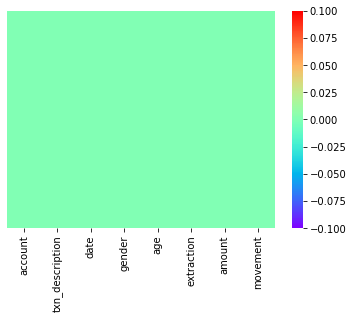

In [14]:
# Checking if any null values still exists
sns.heatmap(train.isnull(),yticklabels=False,cbar=True,cmap="rainbow")

**Observation(s)**:

There are no null values.

In [15]:
train.dtypes

account                    object
txn_description            object
date               datetime64[ns]
gender                     object
age                         int64
extraction                 object
amount                    float64
movement                   object
dtype: object

In [16]:
# Extracting time, date, month, weekday from the timestamp 
train['time'] = pd.to_datetime(train['extraction']).dt.time
train['date'] = pd.to_datetime(train['extraction']).dt.date
train['month'] = pd.to_datetime(train['extraction']).dt.month
train['day'] = pd.to_datetime(train['extraction']).dt.weekday
train.head()

,account,txn_description,date,gender,age,extraction,amount,movement,time,month,day
0,ACC-1598451071,POS,2018-08-01,F,26,2018-08-01T01:01:15.000+0000,16.25,debit,01:01:15,8,2
1,ACC-1598451071,SALES-POS,2018-08-01,F,26,2018-08-01T01:13:45.000+0000,14.19,debit,01:13:45,8,2
2,ACC-1222300524,POS,2018-08-01,M,38,2018-08-01T01:26:15.000+0000,6.42,debit,01:26:15,8,2
3,ACC-1037050564,SALES-POS,2018-08-01,F,40,2018-08-01T01:38:45.000+0000,40.90,debit,01:38:45,8,2
4,ACC-1598451071,SALES-POS,2018-08-01,F,26,2018-08-01T01:51:15.000+0000,3.25,debit,01:51:15,8,2


In [17]:
# Dropping extraction column 
train.drop(['extraction'], axis=1, inplace=True)
train.head()

,account,txn_description,date,gender,age,amount,movement,time,month,day
0,ACC-1598451071,POS,2018-08-01,F,26,16.25,debit,01:01:15,8,2
1,ACC-1598451071,SALES-POS,2018-08-01,F,26,14.19,debit,01:13:45,8,2
2,ACC-1222300524,POS,2018-08-01,M,38,6.42,debit,01:26:15,8,2
3,ACC-1037050564,SALES-POS,2018-08-01,F,40,40.90,debit,01:38:45,8,2
4,ACC-1598451071,SALES-POS,2018-08-01,F,26,3.25,debit,01:51:15,8,2


In [18]:
# Re-arranging the columns
train=train[['date', 'time', 'month', 'day', 'account', 'gender', 'age', 'amount', 'txn_description', 'movement']]
train.head()

,date,time,month,day,account,gender,age,amount,txn_description,movement
0,2018-08-01,01:01:15,8,2,ACC-1598451071,F,26,16.25,POS,debit
1,2018-08-01,01:13:45,8,2,ACC-1598451071,F,26,14.19,SALES-POS,debit
2,2018-08-01,01:26:15,8,2,ACC-1222300524,M,38,6.42,POS,debit
3,2018-08-01,01:38:45,8,2,ACC-1037050564,F,40,40.90,SALES-POS,debit
4,2018-08-01,01:51:15,8,2,ACC-1598451071,F,26,3.25,SALES-POS,debit


In [19]:
train.dtypes

date                object
time                object
month                int64
day                  int64
account             object
gender              object
age                  int64
amount             float64
txn_description     object
movement            object
dtype: object

### 2-D Scatter Plot

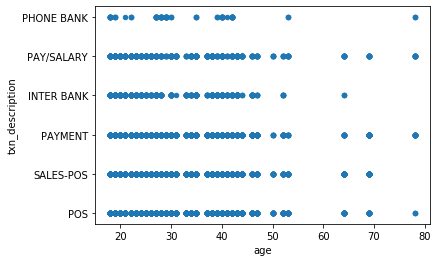

In [20]:
#2-D scatter plot:
train.plot(kind='scatter', x='age', y='txn_description')
plt.show()

**Observation(s):**

1) For people in the age range 60-80, there are very less transaction as compared to other age ranges.

2) People in the age range 60-70 don't have phone banking transactions.

3) People in the age range 70-80 don't have inter bank transactions.

4) People have less phone banking transactions as compared to others transactions.

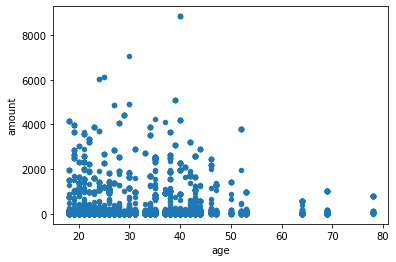

In [21]:
#2-D scatter plot:
train.plot(kind='scatter', x='age', y='amount')
plt.show()

**Observation(s):**

1) For the transaction amount greater than 4000, there are very less transactions.

2) For the age range 20-50, many small amount transactions are made.

3) For the age range 60-80, no transactions are made above the amount of 2000.

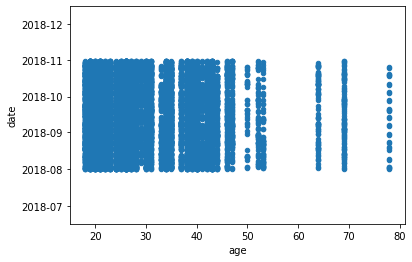

In [22]:
#2-D scatter plot:
train.plot(kind='scatter', x='age', y='date')
plt.show()

**Observation(s):**

1) In the age range 20-50, many people do transactions for the 3 months period.

2) In the age range 50-80, very less people do transactions for the 3 months period. 

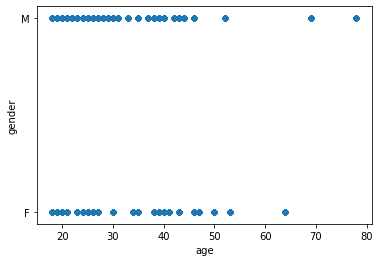

In [23]:
#2-D scatter plot:
train.plot(kind='scatter', x='age', y='gender')
plt.show()

**Observation(s):**

1) For the age range 70-80, no females do any transactions.

2) For the age range 60-70, no males do any transactions.

3) Higher number of transactions are done by males.

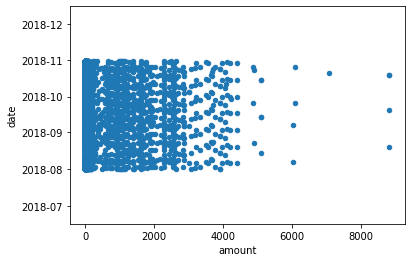

In [24]:
#2-D scatter plot:
train.plot(kind='scatter', x='amount', y='date')
plt.show()

**Observation(s):**

1) For the amount greater than 4000, there are very less transactions.

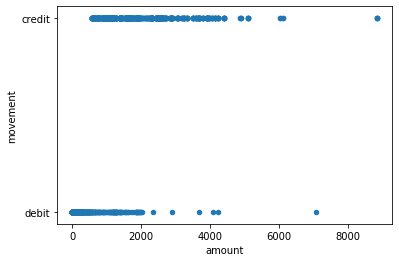

In [25]:
#2-D scatter plot:
train.plot(kind='scatter', x='amount', y='movement')
plt.show()

**Observation(s):**

1) For the amount range 2000-4000, more credit transactions are done as compared to debit.

2) For amount greater than 5000, very less debit and credit transactions are done.

### Countplot

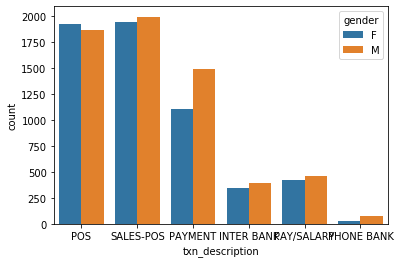

In [26]:
sns.countplot(x="txn_description",hue="gender",data=train)

**Observation(s):**

1) Females do less phone and payment transactions as compared to males.

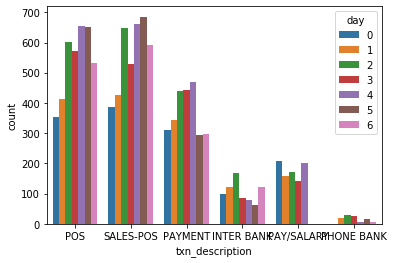

In [27]:
sns.countplot(x="txn_description",hue="day",data=train)

**Observation(s):**

1) Highest transactions are observed on friday and saturday for pos and sales-pos.

2) Highest transactions are observed on friday for payment.

3) Most salary credit transactions are done on monday and friday.

Note: monday == 0 and sunday == 6

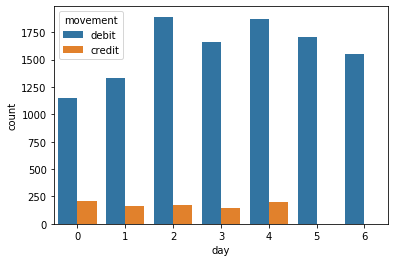

In [28]:
sns.countplot(x="day",hue="movement",data=train)

**Observation(s):**

1) Credit transactions are done on days- monday, tuesday, wednesday, thursday, friday.

2) Most debit transactions are done onwednesday and friday.

### Weekday-wise sum and mean of transaction amount

           sum
day           
0    507580.56
1    329484.19
2    402729.72
3    331402.77
4    516909.84
5     93002.56
6     82174.56


Text(0.5, 1.0, 'Weekday-wise sum of transaction amount')

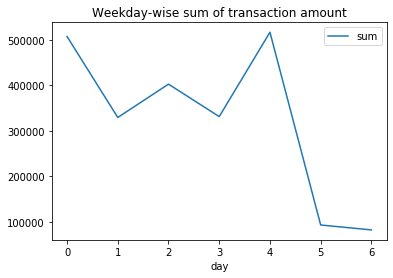

In [29]:
Sum=train.groupby("day")["amount"].agg(['sum'])
print(Sum)
Sum.plot()
plt.title("Weekday-wise sum of transaction amount")

           mean
day            
0    373.221000
1    221.576456
2    195.215570
3    184.010422
4    249.353517
5     54.419286
6     53.015845


Text(0.5, 1.0, 'Weekday-wise mean of transaction amount')

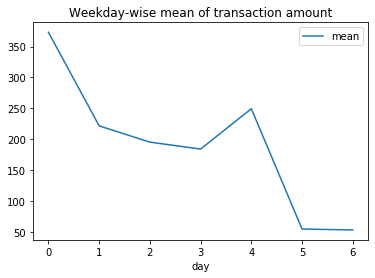

In [30]:
Mean=train.groupby("day")["amount"].agg(['mean'])
print(Mean)
Mean.plot()
plt.title("Weekday-wise mean of transaction amount")

### Monthwise sum and mean of transaction amount

             sum
month           
8      729935.52
9      730550.21
10     802798.47


Text(0.5, 1.0, 'Monthwise sum of transaction amount')

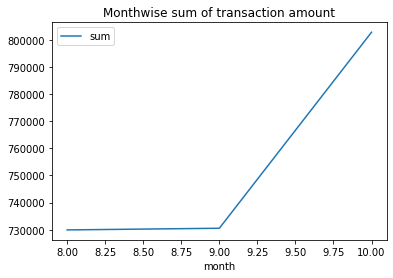

In [31]:
Sum1=train.groupby("month")["amount"].agg(['sum'])
print(Sum1)
Sum1.plot()
plt.title("Monthwise sum of transaction amount")

           mean
day            
0    373.221000
1    221.576456
2    195.215570
3    184.010422
4    249.353517
5     54.419286
6     53.015845


Text(0.5, 1.0, 'Monthwise average of transaction amount')

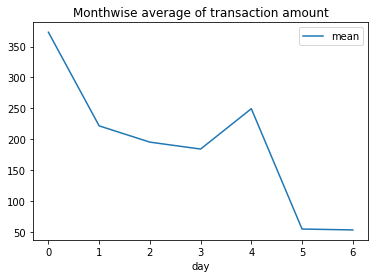

In [32]:
Mean1=train.groupby("day")["amount"].agg(['mean'])
print(Mean1)
Mean1.plot()
plt.title("Monthwise average of transaction amount")

### Datewise sum and mean of transaction amount

                 sum
date                
2018-08-01  29867.94
2018-08-02  21786.32
2018-08-03  38096.58
2018-08-04   6296.05
2018-08-05   4426.50
...              ...
2018-10-27   6971.58
2018-10-28   8438.11
2018-10-29  38549.14
2018-10-30  22062.34
2018-10-31  21967.13

[91 rows x 1 columns]


Text(0.5, 1.0, 'Datewise sum of transaction amount')

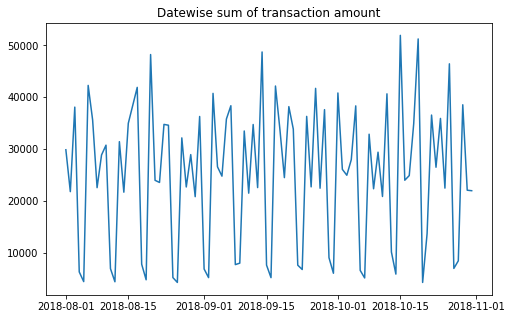

In [33]:
Sum2=train.groupby("date")["amount"].agg(['sum'])
print(Sum2)
plt.figure(figsize=(8,5))
plt.plot(Sum2)
plt.show
plt.title("Datewise sum of transaction amount")

                  mean
date                  
2018-08-01  218.014161
2018-08-02  143.331053
2018-08-03  242.653376
2018-08-04   53.356356
2018-08-05   44.265000
...                ...
2018-10-27   50.155252
2018-10-28   59.007762
2018-10-29  377.932745
2018-10-30  247.891461
2018-10-31  155.795248

[91 rows x 1 columns]


Text(0.5, 1.0, 'Datewise Average of transaction amount')

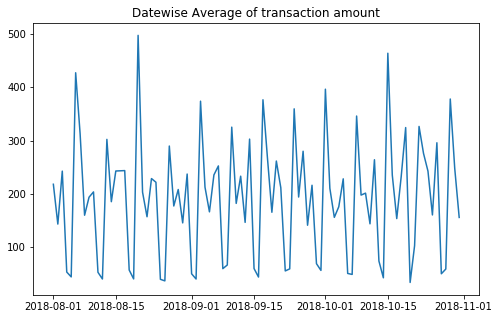

In [34]:
Mean2=train.groupby("date")["amount"].agg(['mean'])
print(Mean2)
plt.figure(figsize=(8,5))
plt.plot(Mean2)
plt.show
plt.title("Datewise Average of transaction amount")

### No. of transactions customers make each month

movement  month
credit    10        313
          8         298
          9         272
debit     10       3774
          9        3741
          8        3645
Name: month, dtype: int64


Text(0.5, 1.0, 'Number of Transactions w.r.t. months')

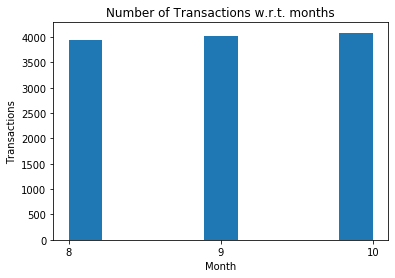

In [35]:
# No. of credit and debit transactions made by customers in respective months
m=train.groupby("movement")["month"].value_counts()
print(m)

plt.hist(train['month'], bins=9)
plt.xlabel('Month')
months=[8,9,10]
plt.xticks(months)
plt.ylabel('Transactions')                                                 
plt.title('Number of Transactions w.r.t. months')

### No. of transactions customers make on weekdays

movement  day
credit    0       207
          4       201
          2       172
          1       160
          3       143
debit     2      1891
          4      1872
          5      1709
          3      1658
          6      1550
          1      1327
          0      1153
Name: day, dtype: int64


Text(0.5, 1.0, 'Number of Transactions w.r.t. weekdays')

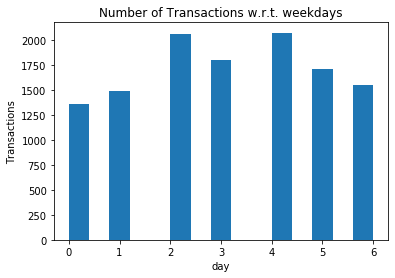

In [36]:
# No. of credit and debit transactions made by customers in respective weekdays
m=train.groupby("movement")["day"].value_counts()
print(m)

plt.hist(train['day'], bins=15)
plt.xlabel('day')
months=[0,1,2,3,4,5,6]
plt.xticks(months)
plt.ylabel('Transactions')                                                 
plt.title('Number of Transactions w.r.t. weekdays')